In [1]:
# Imports
from imutils import build_montages
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import numpy as np
import pandas as pd
import requests
from skimage import io
from PIL import Image as pilImg
from io import BytesIO
import matplotlib.pylab as plt
import seaborn as sns

In [23]:
# download the data
Airbnb_data = pd.read_csv('LosAngeles/listings_2.csv')[:3288]
#make the price column into floats instead of strings
Airbnb_data['price'] = Airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)

# veiw the data
Airbnb_data['picture_url'][1]

'https://a0.muscache.com/pictures/miso/Hosting-2708/original/4308d9cc-bdef-4a3a-974c-305478b0eb53.png'

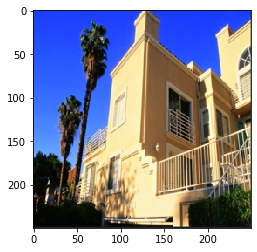

In [3]:
IMAGE_SIZE = [250,250]

response = requests.get(Airbnb_data['picture_url'][1])
img = pilImg.open(BytesIO(response.content)).resize(IMAGE_SIZE)
plt.imshow(img)

## Colorfulness of image
#### Based on code from [here](https://www.pyimagesearch.com/2017/06/05/computing-image-colorfulness-with-opencv-and-python/#pyis-cta-modal)

In [4]:
def image_colorfulness(image): # Codigo tomado de https://www.pyimagesearch.com/2017/06/05/computing-image-colorfulness-with-opencv-and-python/#pyis-cta-modal
    # split the image into its respective RGB components
    (B, G, R) = cv2.split(image.astype("float"))
    # compute rg = R - G
    rg = np.absolute(R - G)
    # compute yb = 0.5 * (R + G) - B
    yb = np.absolute(0.5 * (R + G) - B)
    # compute the mean and standard deviation of both `rg` and `yb`
    (rbMean, rbStd) = (np.mean(rg), np.std(rg))
    (ybMean, ybStd) = (np.mean(yb), np.std(yb))
    # combine the mean and standard deviations
    stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
    meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
    # derive the "colorfulness" metric and return it
    return stdRoot + (0.3 * meanRoot)

In [5]:

# # loop para leer datos
# IMAGE_SIZE = [250,250]
# results = []
# colScrList = []
# i = 0
# for imgLink in Airbnb_data['picture_url']:
#     # load the image, resize it (to speed up computation), and compute the colorfulness metric for the image
#     image = io.imread(imgLink)
#     # print(image.shape)
#     image = imutils.resize(image[:,:,[2,1,0]], width=250) # Habia que cambiar las columnas del RGB porque estaban invertidas
#     C = image_colorfulness(image)
#     # display the colorfulness score on the image
#     cv2.putText(image, "{:.2f}".format(C), (40, 40), 
#         cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 255, 0), 3)
#     # add the image and colorfulness metric to the results list
#     results.append((image, C))
#     colScrList.append(C)
#     i += 1
#     if i % 500==0:
#         print(i)
# Airbnb_data['picture_colorfulness'] = colScrList

In [6]:
# print("[INFO] displaying results...")
# results = sorted(results, key=lambda x: x[1], reverse=True)
# mostColor = [r[0] for r in results[:25]]
# leastColor = [r[0] for r in results[-25:]][::-1]

# # construct the montages for the two sets of images
# mostColorMontage = build_montages(mostColor, (128, 128), (5, 5))
# leastColorMontage = build_montages(leastColor, (128, 128), (5, 5))

# # display the images
# cv2.imshow("Most Colorful", mostColorMontage[0])
# cv2.imshow("Least Colorful", leastColorMontage[0])
# cv2.waitKey(0)

## Image Quality

In [7]:
import imquality.brisque as brisque

In [8]:
# IMAGE_SIZE = [250,250]

# response = requests.get(Airbnb_data['picture_url'][40])
# img = pilImg.open(BytesIO(response.content)).resize(IMAGE_SIZE)
# plt.imshow(img)
# print(brisque.score(img)) #Lo más alto lo más baja la calidad

In [9]:
# i=0
# resultsQual=[]
# quaScrList = []
# for imgLink in Airbnb_data['picture_url']:
#     # load the image, resize it (to speed up computation), and compute the colorfulness metric for the image
#     response = requests.get(imgLink)
#     img = pilImg.open(BytesIO(response.content)).resize(IMAGE_SIZE)
#     scr = brisque.score(img)
#     if scr > 0 and scr < 100:
#         pil_image = img.convert('RGB') 
#         open_cv_image = np.array(pil_image) 
#         # Convert RGB to BGR 
#         open_cv_image = open_cv_image[:, :, ::-1].copy() 

#         # display the quality score on the image
#         cv2.putText(open_cv_image, "{:.2f}".format(scr), (40, 40), 
#             cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 255, 0), 3)
#         # add the image and quality metric to the results list
#         resultsQual.append((open_cv_image, scr))
#         quaScrList.append(scr)
#     else:
#         quaScrList.append(-1)
#     i += 1
#     if i % 100==0:
#         print(i)

# Airbnb_data['picture_quality_brisque'] = quaScrList

In [10]:
# print("[INFO] displaying results...")
# resultsQualDis = sorted(resultsQual, key=lambda x: x[1], reverse=True)
# resultsQualDis = [r for r in resultsQualDis]
# mostQuality = [r[0] for r in resultsQualDis[:25]]
# leastQuality = [r[0] for r in resultsQualDis[-25:]][::-1]

# # construct the montages for the two sets of images
# mostQualityMontage = build_montages(mostQuality, (128, 128), (5, 5))
# leastQualityMontage = build_montages(leastQuality, (128, 128), (5, 5))

# # display the images
# cv2.imshow("Highest Quality", mostQualityMontage[0])
# cv2.imshow("Lowest Quality", leastQualityMontage[0])
# cv2.waitKey(0)

## Lighting of the image
#### Code from [here](https://towardsdatascience.com/measuring-enhancing-image-quality-attributes-234b0f250e10)

In [11]:
import skimage.exposure as skiexp
import math

In [12]:
def pixel_brightness(pixel):
    assert 3 == len(pixel)
    b, g, r = pixel
    return math.sqrt(0.299 * r ** 2 + 0.587 * g ** 2 + 0.114 * b ** 2)
def image_brightness(img):
    nr_of_pixels = len(img) * len(img[0])
    bness = 0
    for row in img:
        for pixel in row:
            bness+=pixel_brightness(pixel)
    return bness / nr_of_pixels

In [13]:
# IMAGE_SIZE = [250,250]

# response = requests.get(Airbnb_data['picture_url'][6])
# img = pilImg.open(BytesIO(response.content)).resize(IMAGE_SIZE)
# plt.imshow(img)

# pil_image = img.convert('RGB') 
# open_cv_image = np.array(pil_image) 
# # Convert RGB to BGR 
# open_cv_image = open_cv_image[:, :, ::-1].copy()

# print(image_brightness(open_cv_image)) #Lo más alto lo más baja la calidad

In [14]:
# i=0
# resultsBright=[]
# brightScrList = []
# for imgLink in Airbnb_data['picture_url']:
#     # load the image, resize it (to speed up computation), and compute the colorfulness metric for the image
#     image = io.imread(imgLink)
#     # print(image.shape)
#     image = imutils.resize(image[:,:,[2,1,0]], width=250) # Habia que cambiar las columnas del RGB porque estaban invertidas
#     B = image_brightness(image)

#     # display the brightness value on the image
#     cv2.putText(image, "{:.2f}".format(B), (40, 40), 
#         cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 255, 0), 3)
#     # add the image and brightness metric to the results list
#     resultsBright.append((image, B))
#     brightScrList.append(B)
#     i += 1
#     if i % 100==0:
#         print(i)

# Airbnb_data['picture_brightness'] = brightScrList

In [15]:
# print("[INFO] displaying results...")
# resultsBright = sorted(resultsBright, key=lambda x: x[1], reverse=True)
# mostB = [r[0] for r in resultsBright[:25]]
# leastB = [r[0] for r in resultsBright[-25:]][::-1]

# # construct the montages for the two sets of images
# mostBMontage = build_montages(mostB, (128, 128), (5, 5))
# leastBMontage = build_montages(leastB, (128, 128), (5, 5))

# # display the images
# cv2.imshow("Brightest", mostBMontage[0])
# cv2.imshow("Darkest", leastBMontage[0])
# cv2.waitKey(0)

## Combination of all algorithms for efficiency 

In [16]:
# Loop to calculate all metrics

# Initialize values
i=0
IMAGE_SIZE = [250,250]
resultsCol = []
colScrList = []
resultsQual=[]
quaScrList = []
resultsBright=[]
brightScrList = []

for imgLink in Airbnb_data['picture_url']:
    # load the image, resize it (to speed up computation)
    response = requests.get(imgLink)
    img = pilImg.open(BytesIO(response.content)).resize(IMAGE_SIZE)
    
    # Covertir pil_image a open_cv_image
    pil_image = img.convert('RGB') 
    open_cv_image = np.array(pil_image) 
    # Convert RGB to BGR
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    
    # Calculate scores of metrics    
    C = image_colorfulness(open_cv_image)
    scr = brisque.score(img)
    B = image_brightness(open_cv_image)
    
    cImg = open_cv_image
    scrImg = open_cv_image
    bImg = open_cv_image
    
    # display the colorfulness score on the image
    cv2.putText(cImg, "{:.2f}".format(C), (40, 40), 
        cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 255, 0), 3)
    # add the image and colorfulness metric to the resultsCol list
    resultsCol.append((cImg, C))
    colScrList.append(C)
    
    if scr > 0 and scr < 100: # Outside this range there are errors
        # display the quality score on the image
        cv2.putText(scrImg, "{:.2f}".format(scr), (40, 40), 
            cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 255, 0), 3)
        # add the image and quality metric to the resultsQual list
        resultsQual.append((scrImg, scr))
        quaScrList.append(scr)
    else:
        quaScrList.append(-1)
        
    # display the brightness value on the image
    cv2.putText(bImg, "{:.2f}".format(B), (40, 40), 
        cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 255, 0), 3)
    # add the image and brightness metric to the resultsBright list
    resultsBright.append((bImg, B))
    brightScrList.append(B)
    
    i += 1
    if i % 100==0:
        print(i)

100


C:\Users\FranciscoEGR1\anaconda3\lib\site-packages\PIL\JpegImagePlugin.py:796: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  "Image appears to be a malformed MPO file, it will be "


200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


C:\Users\FranciscoEGR1\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


2500
2600
2700
2800
2900
3000


C:\Users\FranciscoEGR1\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


3100
3200


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001F5EF247468>

In [24]:
print(len(brightScrList))
Airbnb_data['picture_colorfulness'] = colScrList
Airbnb_data['picture_quality_brisque'] = quaScrList
Airbnb_data['picture_brightness'] = brightScrList

3288


In [25]:
Airbnb_data.head()
Airbnb_data.to_csv('Airbnb_data_imageInfo_test.csv')

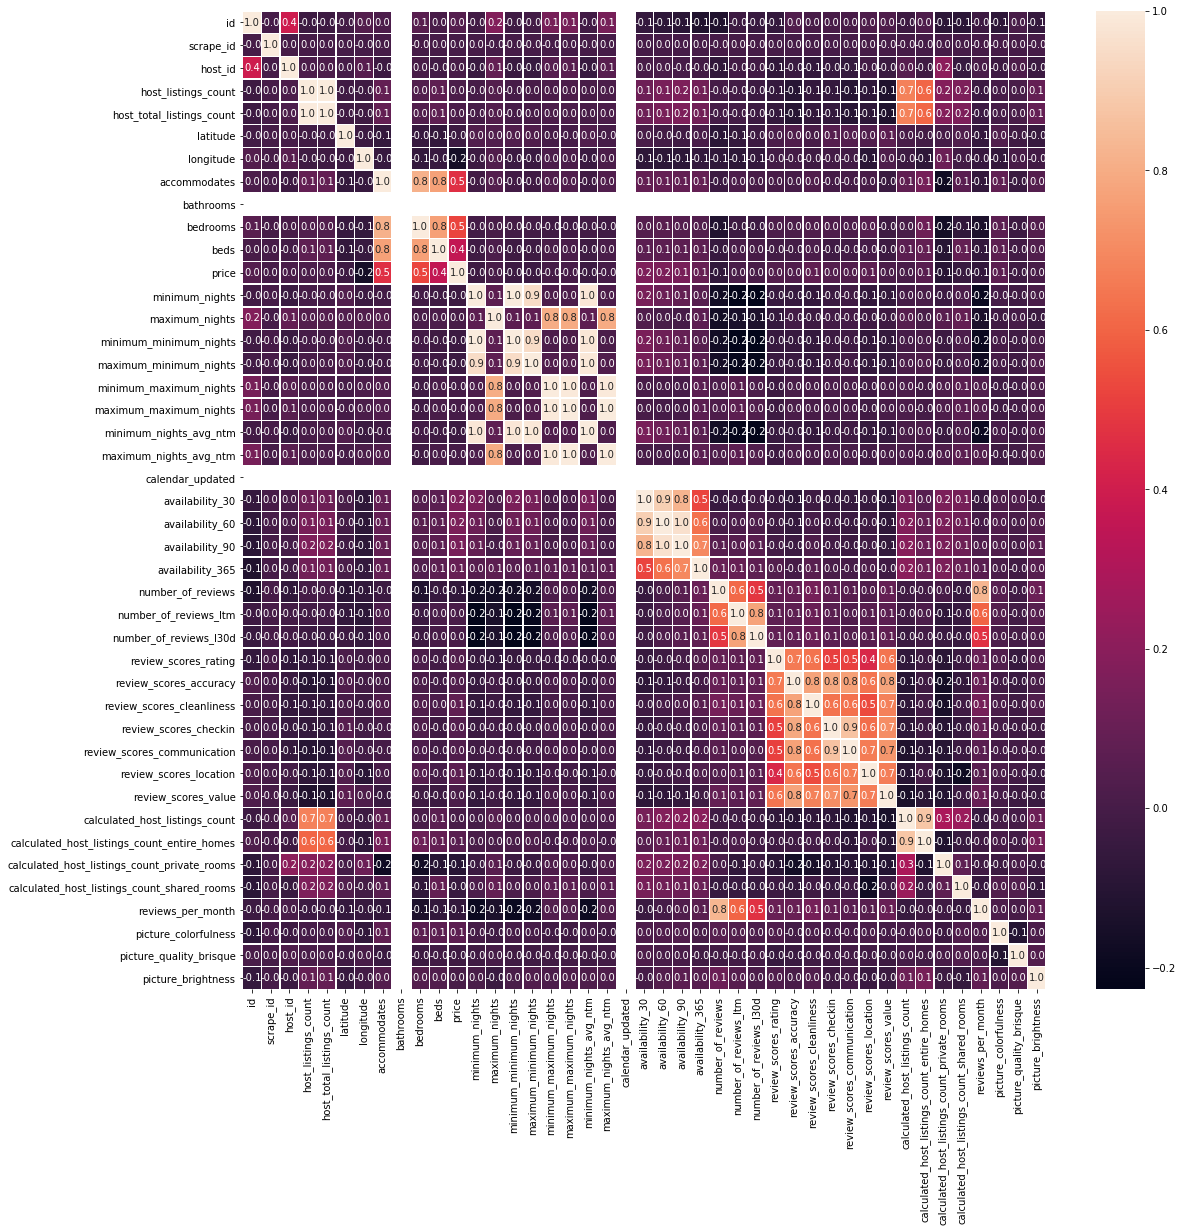

In [26]:
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(Airbnb_data[].corr(), annot=True, linewidths = .5, fmt='.1f', ax = ax)

## Compare with different other values

In [89]:
new_Airbnb_data = Airbnb_data[(Airbnb_data.price > 5) & (Airbnb_data.price <= 2000)]

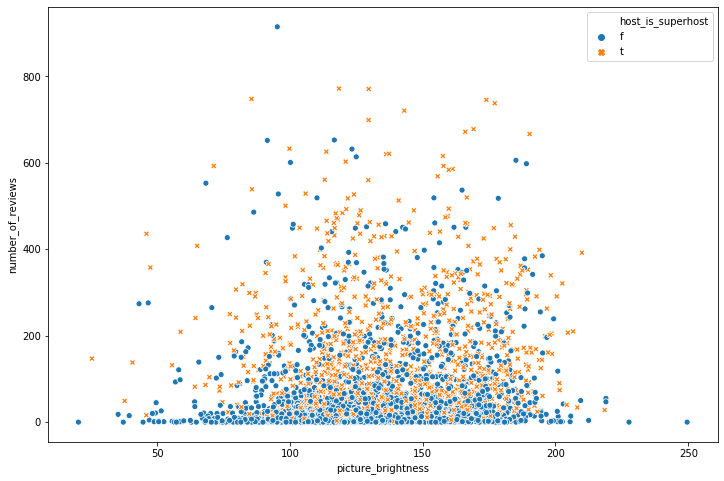

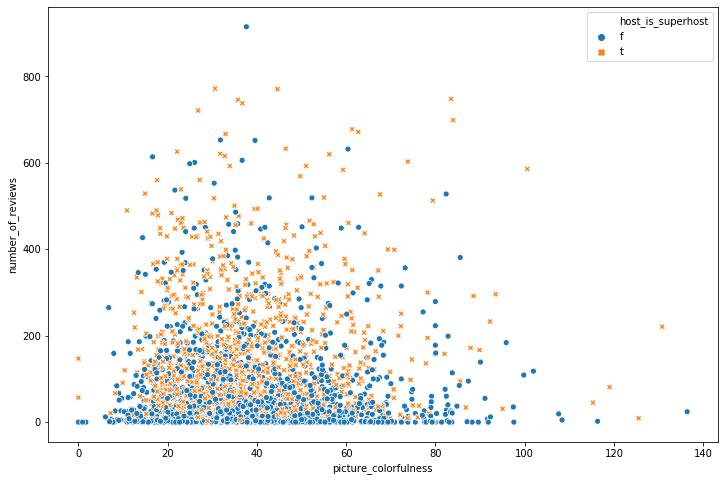

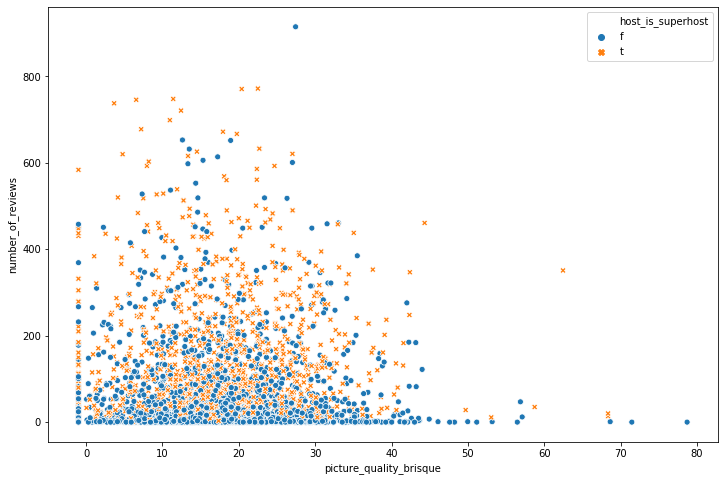

In [90]:
yIn = "number_of_reviews"
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="picture_brightness", y=yIn ,hue="host_is_superhost",style="host_is_superhost")
plt.show()
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="picture_colorfulness",  y=yIn ,hue="host_is_superhost",style="host_is_superhost")
plt.show()
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="picture_quality_brisque",  y=yIn ,hue="host_is_superhost",style="host_is_superhost")
plt.show()

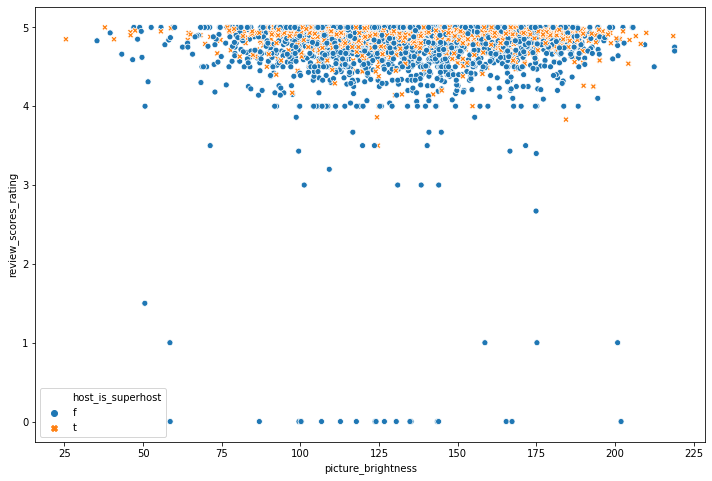

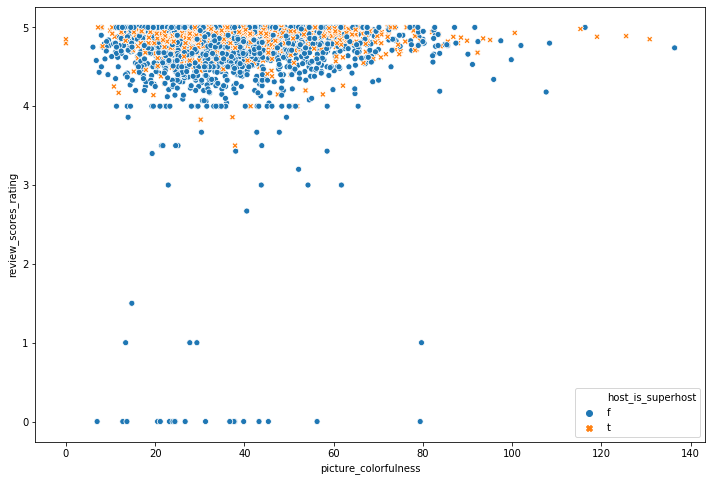

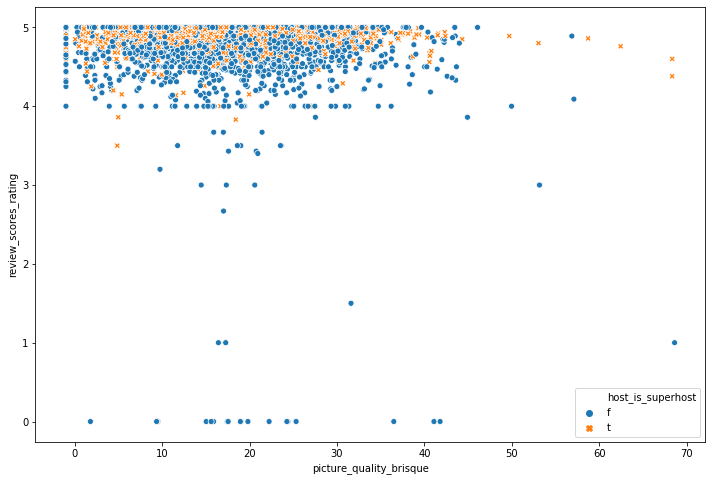

In [91]:
yIn = "review_scores_rating"
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="picture_brightness", y=yIn ,hue="host_is_superhost",style="host_is_superhost")
plt.show()
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="picture_colorfulness",  y=yIn ,hue="host_is_superhost",style="host_is_superhost")
plt.show()
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="picture_quality_brisque",  y=yIn ,hue="host_is_superhost",style="host_is_superhost")
plt.show()

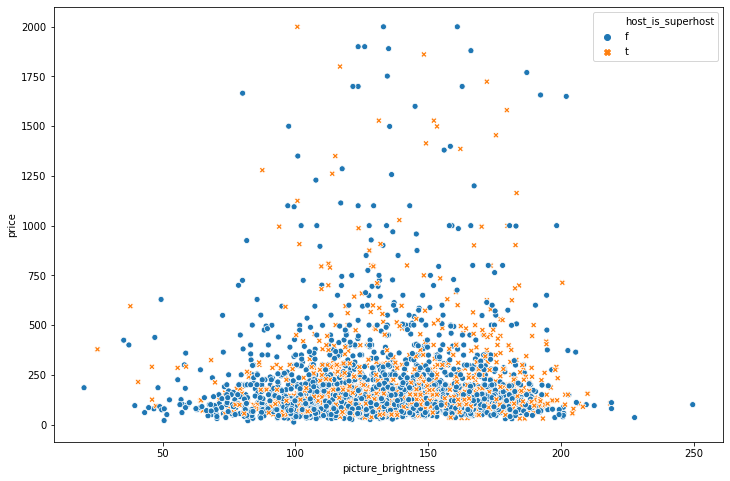

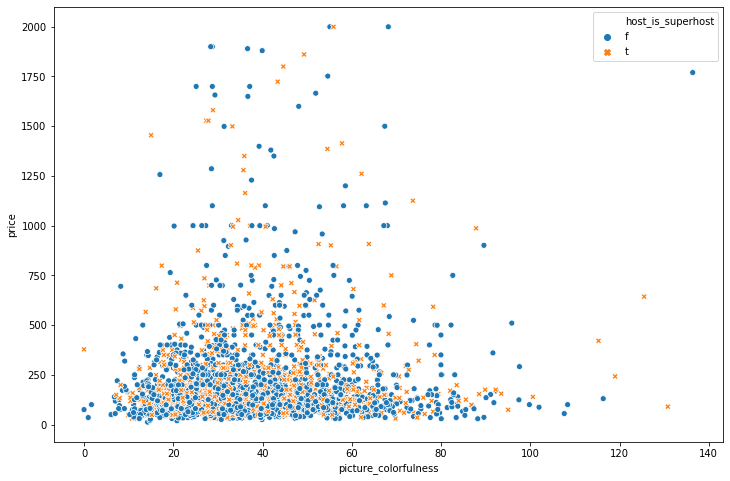

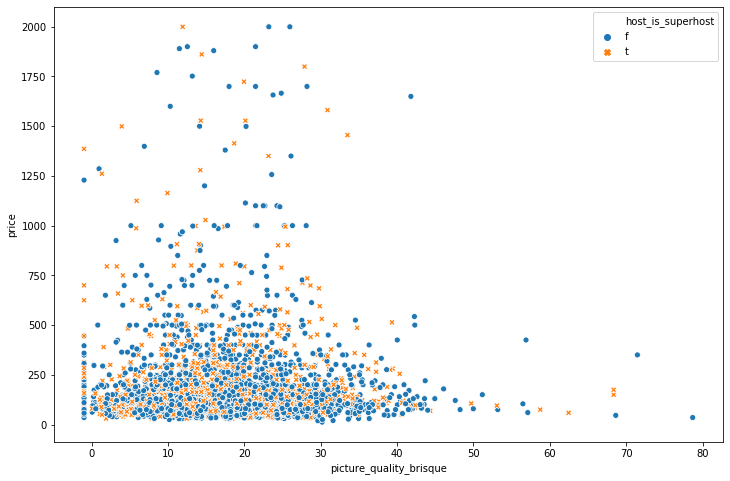

In [92]:
yIn = "price"
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="picture_brightness", y=yIn ,hue="host_is_superhost",style="host_is_superhost")
plt.show()
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="picture_colorfulness",  y=yIn ,hue="host_is_superhost",style="host_is_superhost")
plt.show()
fig = plt.gcf()
# Change seaborn plot size
fig.set_size_inches(12, 8)
sns.scatterplot(data=new_Airbnb_data, x="picture_quality_brisque",  y=yIn ,hue="host_is_superhost",style="host_is_superhost")
plt.show()

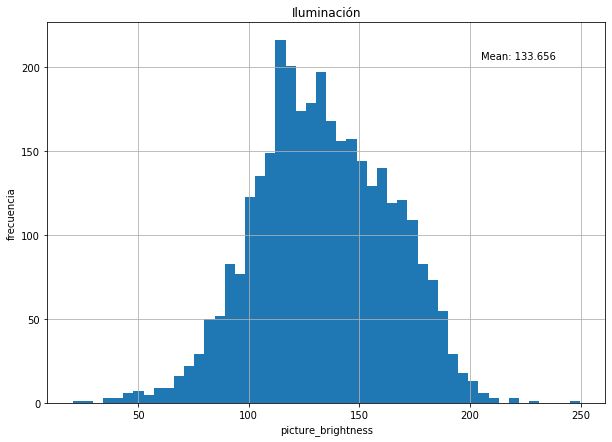

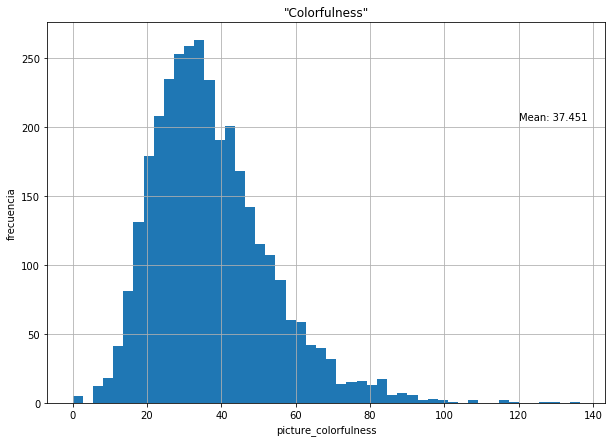

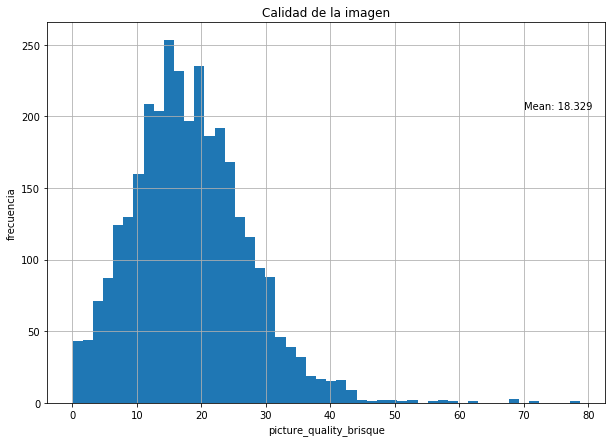

In [94]:
fig, ax = plt.subplots()
ax.text(205, 205, 'Mean: '+ str(round(new_Airbnb_data.picture_brightness.mean(),3)))
ax.set_xlabel('picture_brightness')
ax.set_ylabel('frecuencia')
ax.set_title(r'Iluminación')
new_Airbnb_data.picture_brightness.hist(bins=50, figsize=(10,7))
plt.show()

fig, ax = plt.subplots()
ax.text(120, 205, 'Mean: '+ str(round(new_Airbnb_data.picture_colorfulness.mean(),3)))
ax.set_xlabel('picture_colorfulness')
ax.set_ylabel('frecuencia')
ax.set_title(r'"Colorfulness"')
new_Airbnb_data.picture_colorfulness.hist(bins=50, figsize=(10,7))
plt.show()

fig, ax = plt.subplots()
ax.text(70, 205, 'Mean: '+ str(round(new_Airbnb_data[new_Airbnb_data['picture_quality_brisque']>=0].picture_quality_brisque.mean(),3)))
ax.set_xlabel('picture_quality_brisque')
ax.set_ylabel('frecuencia')
ax.set_title(r'Calidad de la imagen')
new_Airbnb_data[new_Airbnb_data['picture_quality_brisque']>=0].picture_quality_brisque.hist(bins=50, figsize=(10,7))
plt.show()

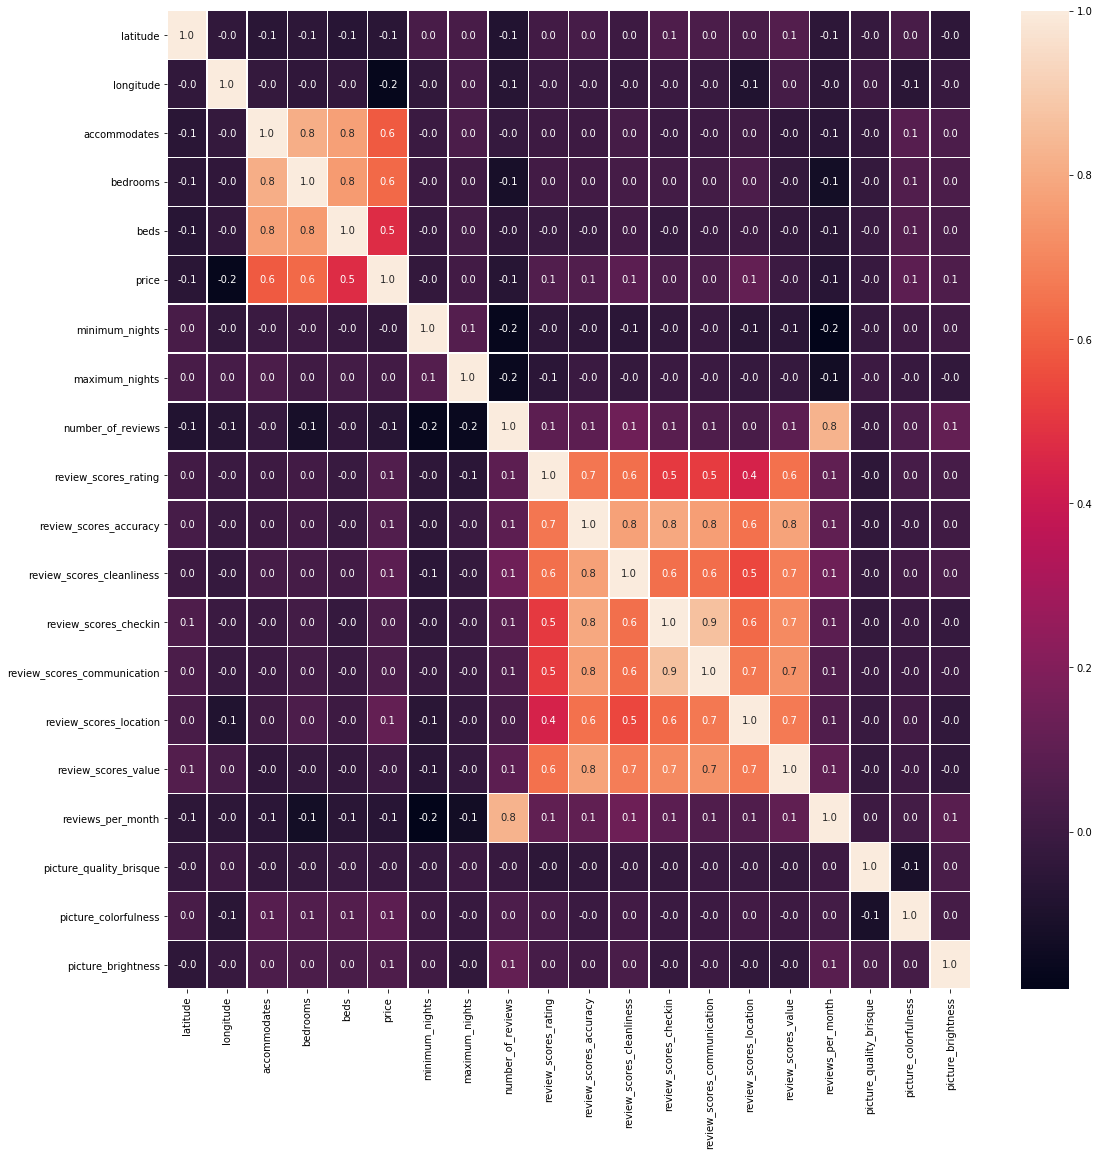

In [98]:
new_Airbnb_data1 = new_Airbnb_data[['listing_url','name','description','neighborhood_overview', 
                          'picture_url','host_location', 'host_about','host_response_time', 'host_response_rate',
                          'host_acceptance_rate','host_is_superhost','host_picture_url','host_neighbourhood',
                          'host_has_profile_pic', 'host_identity_verified', 'neighbourhood','neighbourhood_cleansed','latitude',
                          'longitude', 'property_type', 'room_type', 'accommodates', 
                          'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price','minimum_nights', 
                          'maximum_nights','number_of_reviews','first_review','last_review','review_scores_rating',
                          'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                          'review_scores_communication', 'review_scores_location','review_scores_value',
                          'reviews_per_month','picture_quality_brisque','picture_colorfulness','picture_brightness'
                         ]]
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(new_Airbnb_data1.corr(), annot=True, linewidths = .5, fmt='.1f', ax = ax)